<a href="https://colab.research.google.com/github/Saeedeh8858/MachinLearning-x-Ray.ipynb/blob/main/x_Ray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount drive via code

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%pwd  #checking our present working directory
%ls  #listing the files in the current directory

drive/  sample_data/


# Read File

In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks'
%ls

/content/drive/MyDrive/Colab Notebooks
 MetaData.csv   MetaData_miss.csv  'x Ray.ipynb'


# Import Libraries

In [ ]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer



# Load Data

In [ ]:
#reading file from drive
names = ['gender  ', 'age', 'county', 'Result']
data=read_csv('MetaData.csv',names=names)
data

,,gender,age,county,Result
id,gender,age,county,ptb,remarks
1000,male,31,Shenxhen,0,normal
1001,male,64,Shenxhen,0,normal
1002,male,35,Shenxhen,0,normal
1003,male,32,Shenxhen,1,"STB,ATB,tuberculosis pleuritis"
...,...,...,...,...,...
1699,M,047,Montgomery,1,persistent rt pleural peel with some interval ...
1700,F,030,Montgomery,0,normal
1701,F,044,Montgomery,0,normal
1702,F,030,Montgomery,1,left pleural effusion; best seen on lateral vi...


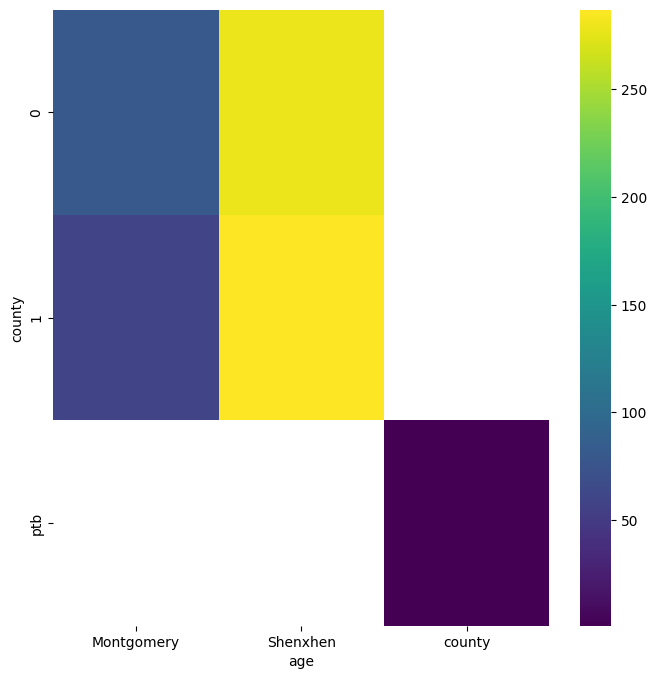

In [ ]:
# @title age vs county

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['county'].value_counts()
    for x_label, grp in data.groupby('age')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('age')
_ = plt.ylabel('county')

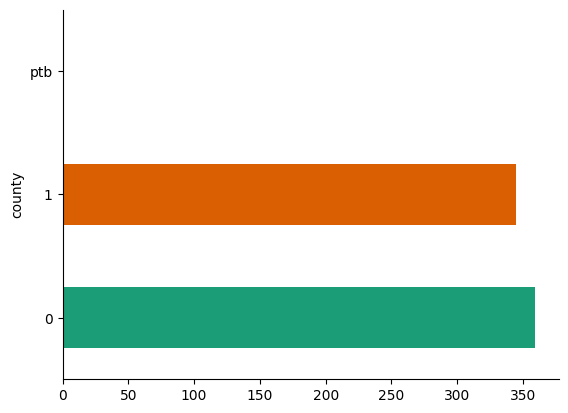

In [ ]:
# @title county

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('county').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Explore Data

In [ ]:
print (data.shape)

print (data.head(5))
print (data.tail(5))
print(data.describe())

print(data.groupby('Result').size())

(705, 4)
            gender         age county                          Result
id   gender      age    county    ptb                         remarks
1000 male         31  Shenxhen      0                          normal
1001 male         64  Shenxhen      0                          normal
1002 male         35  Shenxhen      0                          normal
1003 male         32  Shenxhen      1  STB,ATB,tuberculosis pleuritis
       gender           age county  \
1699 M      047  Montgomery      1   
1700 F      030  Montgomery      0   
1701 F      044  Montgomery      0   
1702 F      030  Montgomery      1   
1703 F      045  Montgomery      0   

                                                   Result  
1699 M  persistent rt pleural peel with some interval ...  
1700 F                                             normal  
1701 F                                             normal  
1702 F  left pleural effusion; best seen on lateral vi...  
1703 F                                    

# Visualizations

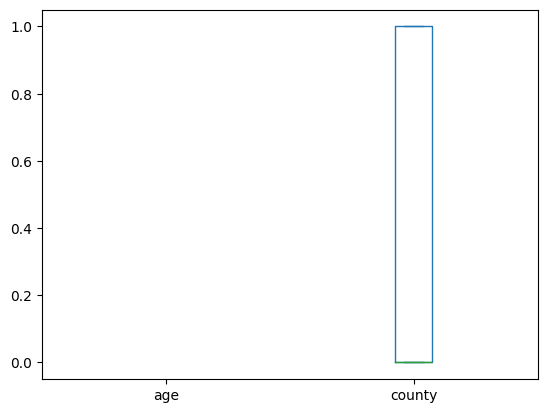

In [ ]:
data['age'] = pd.to_numeric(data['age'], errors='coerce')

# Create the box plot with the converted data.
data.plot(kind='box')
plt.show()


# Missing Values

In [ ]:
data.isnull().sum()

,0
gender,0
age,705
county,1
Result,5


# Reading file with missing data

In [ ]:
data_missing=read_csv('MetaData_miss.csv')
print (data_missing)
data_missing.shape
data_missing.isnull().head(100)

print (data_missing.loc[data_missing['age'].isnull()==True])


       id gender   age      county  ptb  \
0    1000   male  Null    Shenxhen    0   
1    1001   male    64    Shenxhen    0   
2    1002   male    35    Shenxhen    0   
3    1003   male    32    Shenxhen    1   
4    1004   male     2    Shenxhen    1   
..    ...    ...   ...         ...  ...   
699  1699      M    47  Montgomery    1   
700  1700      F    30  Montgomery    0   
701  1701      F    44  Montgomery    0   
702  1702      F    30  Montgomery    1   
703  1703      F    45  Montgomery    0   

                                               remarks  
0                                               normal  
1                                               normal  
2                                               normal  
3                       STB,ATB,tuberculosis pleuritis  
4          secondary PTB  in the bilateral upper field  
..                                                 ...  
699  persistent rt pleural peel with some interval ...  
700                        

# Partitioning the Data

In [ ]:
array = data.values
X = array[:,1:3]
y = array[:,3]

print (X)
print (y)


X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

[['age' 'county']
 ['31' 'Shenxhen']
 ['64' 'Shenxhen']
 ...
 ['044' 'Montgomery']
 ['030' 'Montgomery']
 ['045' 'Montgomery']]
['ptb' '0' '0' '0' '1' '1' '0' '1' '0' '1' '1' '1' '0' '0' '1' '0' '0' '1'
 '1' '1' '0' '1' '1' '0' '1' '0' '0' '1' '1' '0' '1' '0' '1' '0' '1' '1'
 '1' '1' '1' '1' '0' '0' '0' '0' '0' '1' '0' '1' '1' '0' '1' '0' '0' '0'
 '1' '1' '1' '1' '1' '1' '1' '1' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0'
 '1' '0' '1' '1' '1' '0' '0' '0' '0' '1' '0' '1' '1' '0' '1' '0' '0' '1'
 '1' '1' '1' '1' '1' '1' '0' '0' '0' '0' '1' '0' '1' '1' '0' '1' '0' '0'
 '0' '1' '0' '0' '0' '0' '0' '1' '1' '0' '0' '1' '0' '0' '0' '1' '1' '0'
 '0' '0' '1' '1' '1' '1' '1' '0' '1' '0' '0' '0' '0' '0' '1' '1' '1' '0'
 '1' '0' '0' '1' '0' '0' '0' '1' '0' '0' '1' '1' '1' '0' '1' '1' '1' '0'
 '0' '0' '0' '0' '0' '1' '1' '1' '1' '1' '0' '0' '1' '0' '1' '1' '0' '1'
 '1' '0' '0' '0' '1' '1' '1' '1' '0' '0' '1' '0' '1' '1' '0' '0' '1' '1'
 '0' '1' '1' '0' '1' '1' '1' '1' '0' '1' '1' '1' '1' '0' '1' '1' '0

# Model Creation and Training

In [ ]:
# Load the data (make sure 'MetaData.csv' is in the correct path)
names = ['gender', 'age', 'county', 'ptb', 'remarks']
data=read_csv('MetaData.csv',names=names)

# Create a ColumnTransformer to handle categorical features
features = ['gender', 'age', 'county', 'ptb' , 'remarks']  # Use actual column names from your data
 #numerical_features = [] # If you have numerical features, list them here

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), features),
        # ('num', 'passthrough', numerical_features) # Uncomment and modify if needed
    ])

# Apply the preprocessor to your data
X = data[features]  # Selecting the features
# Assuming 'Result' is the target variable, consistent with the partitioning step
y = data['age']
X = preprocessor.fit_transform(X)

# Split data after preprocessing
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

model = LogisticRegression(solver='liblinear', multi_class='ovr')
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
cv_results

model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

predictions

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) inste

array(['45', '38', '64', '38', '36', '30', '25', '45', '39', '27', '43',
       '42', '35', '23', '056', '37', '044', '31', '29', '28', '31',
       '020', '35', '28', '53', '31', '28', '45', '33', '29', '30', '26',
       '056', '22', '34', '2', '19', '26', '028', '25', '43', '53', '36',
       '016', '30', '32', '28', '63', '25', '27', '40', '38', '39', '032',
       '054', '53', '044', '43', '053', '24', '49', '52', '24', '056',
       '31', '29', '34', '53', '054', '60', '23', '39', '29', '044', '28',
       '28', '19', '43', '22', '049', '21', '32', '40', '056', '053',
       '40', '032', '089', '27', '39', '32', '056', '31', '34', '053',
       '26', '38', '049', '031', '50', '26', '31', '78', '28', '27', '23',
       '053', '26', '37', '043', '55', '25', '056', '38', '20', '25',
       '47', '25', '41', '64', '42', '38', '78', '27', '36', '035', '22',
       '049', '24', '30', '32', '43', '011', '089', '049', '053', '23',
       '36', '33', 'male35', '53'], dtype=object)

# Predictioc

In [ ]:
print (Y_validation)
print (predictions)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

['1' '1' '0' '0' '1' '0' '1' '0' '1' '0' '1' '1' '0' '0' '0' '1' '0' '0'
 '1' '1' '1' '0' '1' '1' '1' '1' '0' '0' '0' '1' '0' '1' '0' '0' '1' '0'
 '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '1' '1' '1' '0' '0' '1' '0'
 '1' '0' '0' '0' '0' '1' '1' '0' '0' '0' '1' '1' '0' '0' '1' '0' '0' '1'
 '0' '0' '0' 'ptb' '0' '1' '1' '1' '0' '0' '1' '0' '0' '1' '1' '1' '0' '1'
 '1' '0' '0' '0' '0' '0' '0' '1' '1' '0' '1' '1' '1' '0' '0' '1' '0' '1'
 '0' '0' '1' '0' '0' '1' '1' '0' '0' '0' '0' '0' '0' '1' '1' '1' '1' '0'
 '0' '1' '0' '0' '1' '1' '0' '1' '1' '0' '0' '1' '0' '1' '0']
['45' '38' '64' '38' '36' '30' '25' '45' '39' '27' '43' '42' '35' '23'
 '056' '37' '044' '31' '29' '28' '31' '020' '35' '28' '53' '31' '28' '45'
 '33' '29' '30' '26' '056' '22' '34' '2' '19' '26' '028' '25' '43' '53'
 '36' '016' '30' '32' '28' '63' '25' '27' '40' '38' '39' '032' '054' '53'
 '044' '43' '053' '24' '49' '52' '24' '056' '31' '29' '34' '53' '054' '60'
 '23' '39' '29' '044' '28' '28' '19' '43' '22' '049' '21' '

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

# Different Models & Make Predictions

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks
 MetaData.csv   MetaData_miss.csv  'x Ray.ipynb'


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

LR: 0.578571 (0.068325)
LDA: 0.587500 (0.063109)
KNN: 0.551786 (0.062602)
CART: 0.560714 (0.053093)
NB: 0.550000 (0.061756)
SVM: 0.592857 (0.053452)


<ipython-input-46-872f5c50984a>:76: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=names)


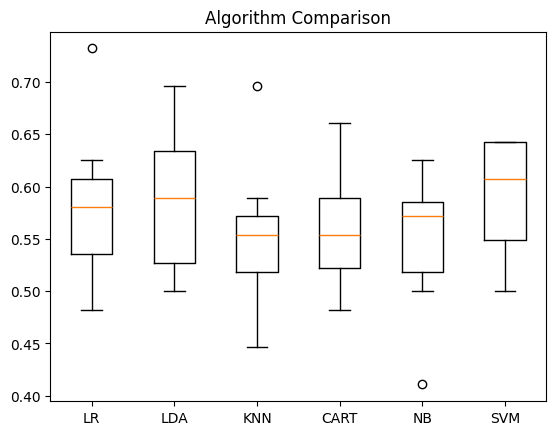

In [ ]:
# Spot Check Algorithms
from pandas import read_csv
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from pandas import get_dummies
from sklearn.preprocessing import LabelEncoder
# Load dataset
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Colab Notebooks'
%ls
#reading file from drive
import pandas as pd
names = ['gender', 'age', 'county', 'ptb', 'remarks']
data=read_csv('MetaData.csv',names=names)

# Encode non-numeric features
label_encoder = LabelEncoder()

data['gender'] = label_encoder.fit_transform(data['gender'])
data['county'] = label_encoder.fit_transform(data['county'])

# Prepare features and labels
X = data[['gender', 'age', 'county', 'ptb', 'remarks']].values

# Convert to numeric
y = label_encoder.fit_transform(y)
# Option 1: Remove rows with missing values
data.dropna(inplace=True)

# Split-out validation dataset
array = data.values
X = array[:,0:3]
X[:, 1] = pd.to_numeric(X[:, 1], errors='coerce')
y = array[:,3]

# Impute missing values using SimpleImputer
# This replaces NaN with the most frequent value for that column
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent') # You can change the strategy if needed
X = imputer.fit_transform(X)

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
 # Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()


# Prediction

In [ ]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate Prediction

In [ ]:
# Make predictions on validation dataset
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # Importing necessary functions
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.5642857142857143
[[52 15  0]
 [45 27  0]
 [ 1  0  0]]
              precision    recall  f1-score   support

           0       0.53      0.78      0.63        67
           1       0.64      0.38      0.47        72
         ptb       0.00      0.00      0.00         1

    accuracy                           0.56       140
   macro avg       0.39      0.38      0.37       140
weighted avg       0.58      0.56      0.55       140



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
